In [1]:
###################################
# Drawbacks/Future Modifications:
#  Expects .csv file with the first row being attribute titles
#  Cannot choose from test set to try tree
#  

In [2]:
import pandas as pd
import sys
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [3]:
def load_data(filename):
        return pd.read_csv(filename)


In [4]:
#####################
# Learn new Tree 
# Will interactively guide user to enter all required files
# Returns array containing the tree, list of attributes, and the target attribute
#####################
def LearnNewTree():
    dataPath = input("Enter name of data file: ")
    while dataPath != "" and dataPath[-4:] != ".csv": 
        isCSV = input("Is this a CSV?: ").lower()
        if isCSV.find("y") != -1: dataPath += ".csv"
        else: dataPath = input("Sorry, we need a .CSV file.\nEnter New File: ")

    try: 
        data = load_data(dataPath).dropna()

        targetCol = input("Target column name or col num: ")
        while targetCol == "": targetCol = input("Need Target name. Target Column name or col num: ")

        #Split the Data
        train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)
    
    except Exception as e:
        print("Exception: " ,e)
        print('Sorry, data invalid. Is {} a valid csv datafile?'.format(dataPath))
        return -1
    
    try:     
        if targetCol.isnumeric():
            targetCol = int(targetCol)
            if targetCol < len(train_set):
                X = pd.concat([train_set.iloc[:,:targetCol],train_set.iloc[:,targetCol+1:]], axis=1, sort=False) 
                y = train_set.iloc[:,targetCol]
            else:
                X = train_set.iloc[:,:-1]
                y = train_set.iloc[:,-1]
        else:
            X = train_set.drop(targetCol, axis=1)
            y = train_set[targetCol].copy()

    except Exception as e:
        print("Exception: " ,e)
        print('Sorry, target column invalid. Is {} a valid target column?'.format(targetCol))
        return -1

    treeType = -1
    while treeType == -1:
        userIn = input("(R) for Regression tree, (C) for Classification tree: ").lower()
        if userIn.find("r") != -1: treeType = 1
        elif userIn.find("c") != -1: treeType = 2
            
    if(treeType == 1):
        myTree = DecisionTreeRegressor(max_depth = 3, random_state = 42)
    if(treeType == 2):
        myTree = DecisionTreeClassifier(max_depth = 3, random_state = 42)
    
    myTree.fit(X, y)
    return [myTree, list(X), y.name]


In [5]:
#####################
# Pickles the array containing tree, attributes and target
# Will interactively guide user to enter all required files
# Returns true if successful, o.w. print error and return false
#####################
def SaveTree(myTree):
    treeFile = ""
    while treeFile == "":
        treeFile = input("Tree File Name: ")
    try:
        pickle.dump(myTree, open(treeFile+".pickle", "wb"))
        return True
    
    except Exception as e:
        print("Oops, ", e)
        return false

In [6]:
#####################
# Unpickles the array containing the tree, attributes and target
# Will interactively guide user to enter all required files
# Returns the tree, attributes, and target 
#####################
def LoadTree():
    try:
        treeFile = ""
        while treeFile == "":
            treeFile = input("Tree File Name: ")
        myTree = pickle.load(open(treeFile+".pickle", "rb"))
        return myTree
    
    except Exception as e: 
        print("LoadTree file {} is invalid".format(treeFile))
        return -1
   
    

In [7]:
########################
# Allows for one test case
# Takes the tree, a list of attributes, and the target name
# Prompts user to enter the feature for each attribute
# Returns the target
########################
def MakeDecision(myTree):
    features = []
    theTree, myAttributes = myTree[0], myTree[1]
    for attrib in myAttributes:
        userIn = ""
        while userIn == "": 
            userIn = input("{}: ".format(attrib))
        if userIn.isnumeric():
            features.append(float(userIn))
        else:
            features.append(userIn)
    return theTree.predict([features])

In [8]:
#def testCase(myTree, test_set):
#    testRow = input("Using test set; ")
    
    

In [30]:
from sklearn.tree import export_graphviz

def showTree(myTree):
    export_graphviz(
        myTree[0],
        out_file="myTree",
        feature_names=myTree[1],
        rounded=True,
        filled=True
    )
    from graphviz import render, Source
    return (Source.from_file('myTree'))

In [31]:
def main():
    try:
        myTree = -1 #empty Tree
        while(True):
            if myTree == -1:
                userIn = input("(1) to learn new decision tree\n"
                               "(4) to load previous decision tree\n"
                               "(5) to quit\n"
                               ">> "
                              )
            else: 
                userIn = input("(1) to learn new decision tree\n"
                               "(2) to save current tree\n"
                               "(3) to apply tree to new cases\n"
                               "(4) to load previous decision tree\n"
                               "(5) to quit\n"
                               ">> "
                              )
                
            if userIn.find("1") != -1:
                print("\nLearning New Tree\n")
                myTree = LearnNewTree()
            
            elif userIn.find("2") != -1:
                print("\nSaving Tree\n")
                SaveTree(myTree)
            
            elif userIn.find("3") != -1:
                print("\nApply Decision Tree\n")
                while(userIn.find("5") == -1):
                    print("Decision: ", MakeDecision(myTree))
                    userIn = input(  "(3) to continue decision-making\n"
                                     "(5) to quit\n"
                                     ">> "
                                  )
            
            elif userIn.find("4") != -1:
                print("\nLoading Tree\n")
                myTree = LoadTree()
            
            elif userIn.find("5") != -1:
                print("\nQuitting program...\n")
                break
            
            else:
                print("Sorry, command not recognized. Please try again.")
                continue
        if myTree != -1:
            return showTree(myTree)
        print("Thank you for learning with our Decision Tree")
        print("Program exiting...")
    except Exception as e:
        print(e)
        print("Program terminating...")
        return(1)

In [33]:
 if __name__== "__main__": 
        myTreePicture = main()

(1) to learn new decision tree
(4) to load previous decision tree
(5) to quit
>> 4

Loading Tree

Tree File Name: myInfoTree
(1) to learn new decision tree
(2) to save current tree
(3) to apply tree to new cases
(4) to load previous decision tree
(5) to quit
>> 4

Loading Tree

Tree File Name: myInfoTree
(1) to learn new decision tree
(2) to save current tree
(3) to apply tree to new cases
(4) to load previous decision tree
(5) to quit
>> 5

Quitting program...



In [ ]:
from os import remove
remove("myTree")

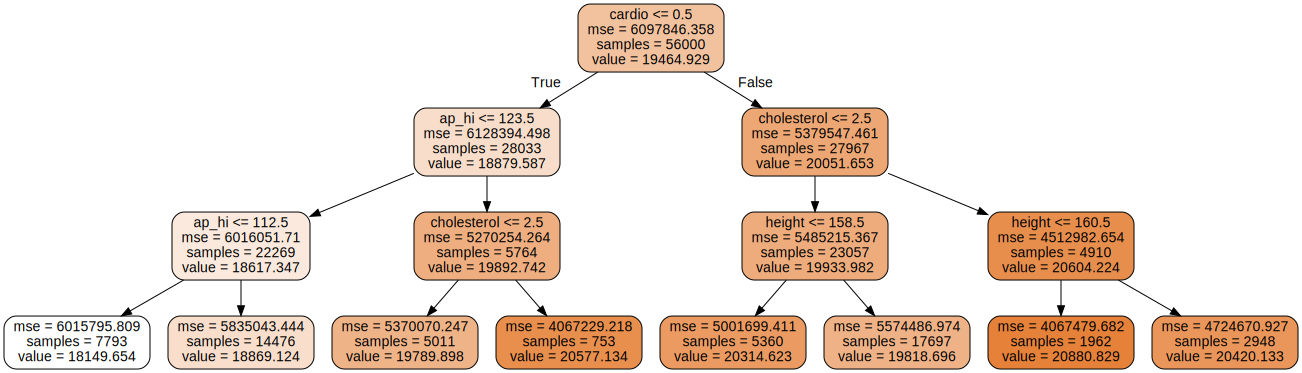

In [35]:
myTreePicture